In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
#경고창무시?
import warnings
warnings.filterwarnings("ignore")
#TimeSeries분석
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

In [2]:
start = datetime(2016, 1, 1)  
end = datetime(2020, 12, 7)
disney = pdr.DataReader('DIS', 'yahoo', start=start, end=end)
disney.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,106.309998,105.059998,106.139999,105.080002,6670100.0,99.137009
2016-01-04,103.430000,101.730003,103.120003,102.980003,12531500.0,97.155785
2016-01-05,102.669998,99.889999,102.669998,100.900002,16212900.0,95.193428
2016-01-06,101.459999,99.360001,99.379997,100.360001,13934500.0,94.683952
2016-01-07,101.349998,98.519997,98.959999,99.500000,14680200.0,93.872604


In [3]:
disney.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,151.399994,149.000000,149.570007,149.440002,8827800.0,149.440002
2020-12-02,154.009995,148.339996,149.490005,153.610001,10601900.0,153.610001
2020-12-03,154.440002,152.130005,153.449997,153.240005,9063200.0,153.240005
2020-12-04,154.679993,152.809998,153.690002,154.139999,6029700.0,154.139999
2020-12-07,153.490005,152.274994,153.179993,152.589996,1099322.0,152.589996


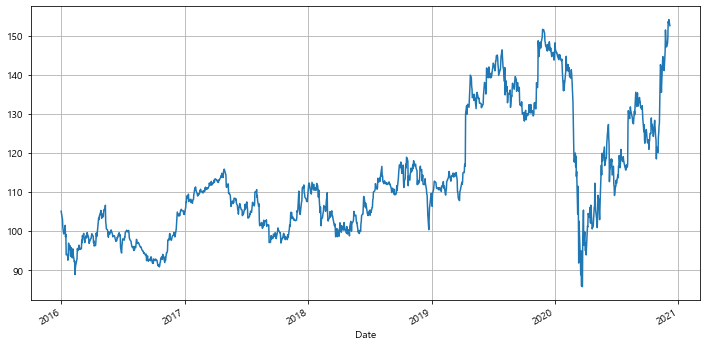

In [4]:
disney.Close.plot(figsize=(12,6), grid=True)  
plt.show()

In [6]:
disney_trunc = disney[:'2020-01-01'] 
disney_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,145.429993,144.449997,144.580002,145.289993,3508500.0,145.289993
2019-12-26,145.860001,145.169998,145.399994,145.699997,4422000.0,145.699997
2019-12-27,146.509995,145.449997,146.050003,145.750000,5495300.0,145.750000
2019-12-30,145.869995,143.399994,145.750000,143.770004,6602800.0,143.770004
2019-12-31,144.770004,143.259995,143.669998,144.630005,5662900.0,144.630005


In [7]:
dis = pd.DataFrame({'ds': disney.index, 'y': disney.Close})   
dis.reset_index(inplace=True)    
del dis['Date']  
dis.head()

,ds,y
0,2015-12-31,105.080002
1,2016-01-04,102.980003
2,2016-01-05,100.900002
3,2016-01-06,100.360001
4,2016-01-07,99.500000


In [9]:
disney_model = Prophet(daily_seasonality=True)   
disney_model.fit(dis)  

In [10]:
disney_future = disney_model.make_future_dataframe(periods=343)
disney_future.tail()

,ds
1581,2021-11-11
1582,2021-11-12
1583,2021-11-13
1584,2021-11-14
1585,2021-11-15


In [11]:
disney_forecast = disney_model.predict(disney_future)

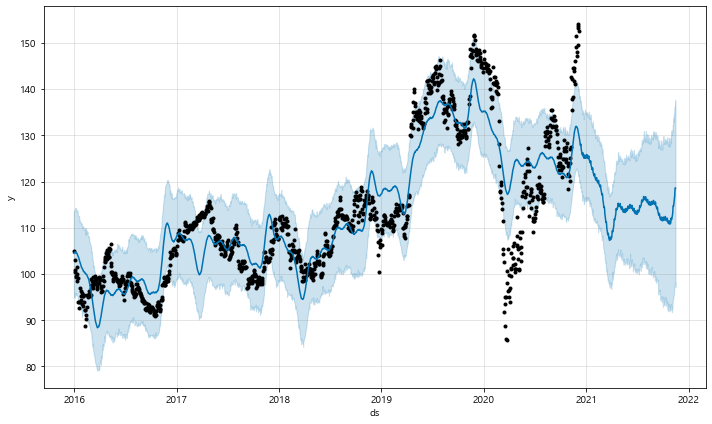

In [12]:
disney_model.plot(disney_forecast); 

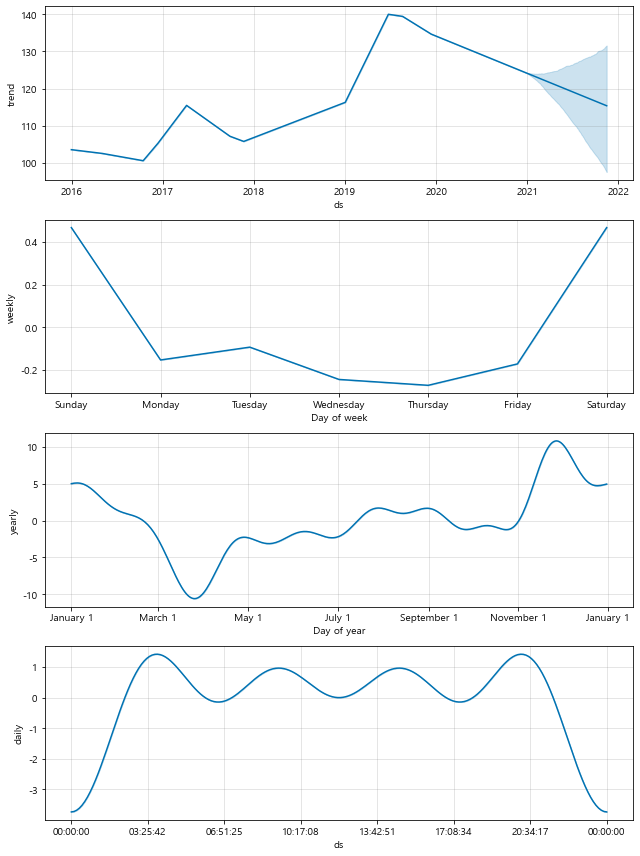

In [13]:
disney_model.plot_components(disney_forecast); 

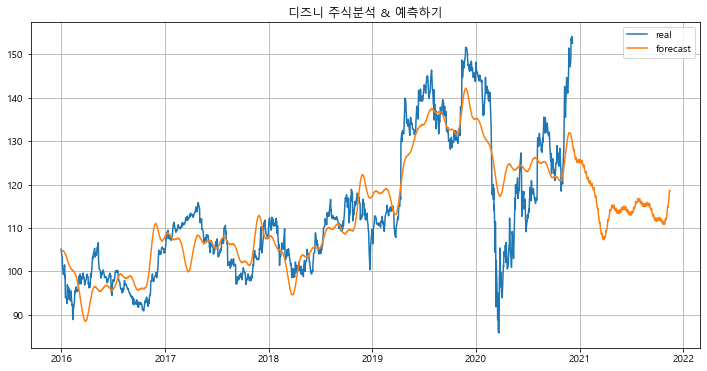

In [14]:
plt.figure(figsize=(12,6))
plt.plot(disney.index, disney.Close, label='real')
plt.plot(disney_forecast.ds, disney_forecast.yhat, label='forecast')
plt.title('디즈니 주식분석 & 예측하기')
plt.grid()
plt.legend()
plt.show()  

In [15]:
#향후 6개월간 주식전망
n_disney = pd.DataFrame({'ds':disney.index, 'y':disney.Close})
n_disney.reset_index(inplace=True)
del n_disney['Date']
n_disney.head()

,ds,y
0,2015-12-31,105.080002
1,2016-01-04,102.980003
2,2016-01-05,100.900002
3,2016-01-06,100.360001
4,2016-01-07,99.500000


In [16]:
disney_n_model = Prophet(daily_seasonality=True)
disney_n_model.fit(n_disney)

In [17]:
disney_n_future = disney_n_model.make_future_dataframe(periods=180)
disney_n_future.tail()

,ds
1418,2021-06-01
1419,2021-06-02
1420,2021-06-03
1421,2021-06-04
1422,2021-06-05


In [18]:
disney_n_forecast = disney_n_model.predict(disney_n_future)

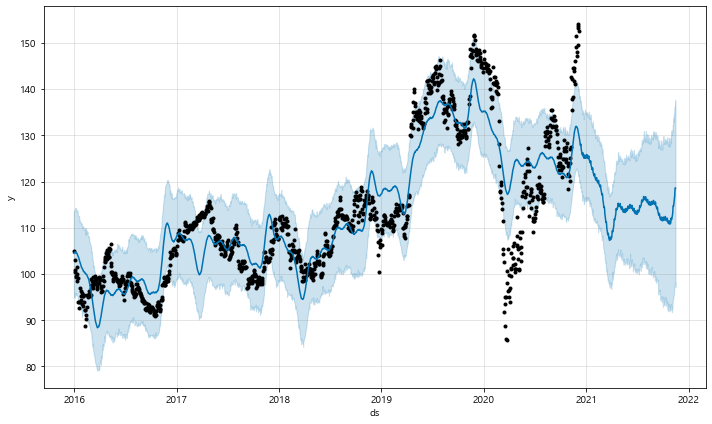

In [19]:
disney_n_model.plot(disney_forecast);

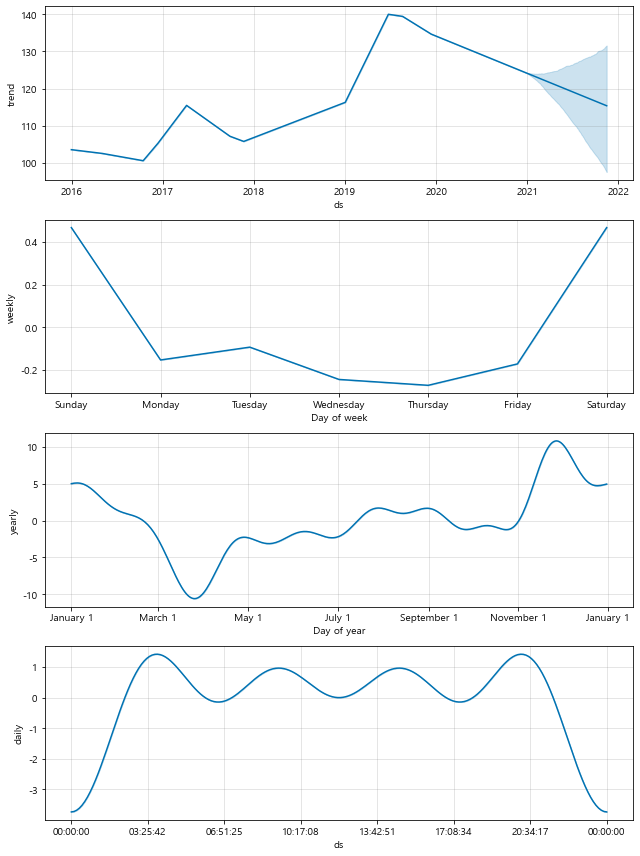

In [20]:
disney_n_model.plot_components(disney_forecast);